In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from edu.javerianacali.create_dataset import CreateDataSet
from edu.javerianacali.model.ccn_model import ConvulationalNeuralNetwork
from edu.javerianacali.model.logistic_regression_model import LogisticRegressionModel
from edu.javerianacali.process_images import ProcessImages
from edu.javerianacali.data_aumentation import DataAugmentation
from edu.javerianacali.model.svm_model import SupportVectorMachineModel
directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"


2024-05-04 15:06:44.317382: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 15:06:44.394482: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 15:06:44.679682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-04 15:06:45.671458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# AUMENTO DE DATOS

In [ ]:

from edu.javerianacali.data_aumentation import DataAugmentation

DataAugmentation().augment_images(directorio+'/poquitas'

)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,96)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:
create_dataset = CreateDataSet().create_dataset(directorio)
LogisticRegressionModel().prepare_dataset(directorio)
print(create_dataset[1])
LogisticRegressionModel().train_model(create_dataset[0], create_dataset[1])



In [ ]:


from edu.javerianacali.model.svm_model import SupportVectorMachineModel
create_dataset = CreateDataSet().create_dataset(directorio)
features, labels = create_dataset[0], create_dataset[1]
print(features)
SupportVectorMachineModel().train_svm_model(features, labels)


# ALGORITMOS NO SUPERVISADOS

In [ ]:
path=directorio
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith(".JPG") or archivo.endswith(".jpg"):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,500,500)
       # ProcessImages().mostrar_imagenes(titulos, imagenes)



In [ ]:

CreateDataSet().create_dataset_cnn(directorio)

In [2]:
directorio = "/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from edu.javerianacali.create_dataset import CreateDataSet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
        # Crea un generador de datos de imagen con normalización




datagen = ImageDataGenerator(rescale=1./255,shear_range=0.15,zoom_range=0.15,horizontal_flip=True)
print(directorio
+'/train')
# Carga las imágenes desde el directorio
# Asegúrate de que dentro de este directorio, las imágenes estén organizadas en subdirectorios según su etiqueta/clase
generator = datagen.flow_from_directory(
directorio+'/train',
target_size=(500, 500),  # Asegúrate de que estas dimensiones coincidan con el preprocesamiento que hiciste
batch_size=32,
class_mode='categorical' ) # Usa 'binary' si solo tienes dos clases


# Generador de datos de validación
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    directorio+'/test',
    target_size=(500, 500),
    batch_size=32,
    class_mode='categorical'
)


/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/assets/train
Found 764 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


/home/maucasco/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 245, 247, 64)   │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 122, 123, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 120, 121, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 460800)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    58,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,088,322 (225.40 MB)

 Trainable params: 59,088,322 (225.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/home/maucasco/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-04 16:06:20.530451: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1015824384 exceeds 10% of free system memory.
2024-05-04 16:06:24.575407: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1015824384 exceeds 10% of free system memory.


 1/24 ━━━━━━━━━━━━━━━━━━━━ 5:15 14s/step - accuracy: 0.5625 - loss: 0.6868

2024-05-04 16:06:25.923840: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1015824384 exceeds 10% of free system memory.
2024-05-04 16:06:29.840522: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1015824384 exceeds 10% of free system memory.


 2/24 ━━━━━━━━━━━━━━━━━━━━ 1:55 5s/step - accuracy: 0.5625 - loss: 4.0455 

2024-05-04 16:06:31.163122: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1015824384 exceeds 10% of free system memory.


24/24 ━━━━━━━━━━━━━━━━━━━━ 152s 6s/step - accuracy: 0.7435 - loss: 2.1387 - val_accuracy: 0.9438 - val_loss: 0.1636
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 144s 6s/step - accuracy: 0.9124 - loss: 0.2600 - val_accuracy: 0.9563 - val_loss: 0.1443
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 151s 6s/step - accuracy: 0.9289 - loss: 0.2017 - val_accuracy: 0.9625 - val_loss: 0.1228
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - accuracy: 0.9435 - loss: 0.2030 - val_accuracy: 0.9625 - val_loss: 0.1070
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.9396 - loss: 0.1584 - val_accuracy: 0.9688 - val_loss: 0.1015
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.9337 - loss: 0.1950 - val_accuracy: 0.9656 - val_loss: 0.1101
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9462 - loss: 0.1821 - val_accuracy: 0.9656 - val_loss: 0.1120
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.9547 - loss: 0.1450 - val_accuracy: 0.9719 - val_loss: 0.

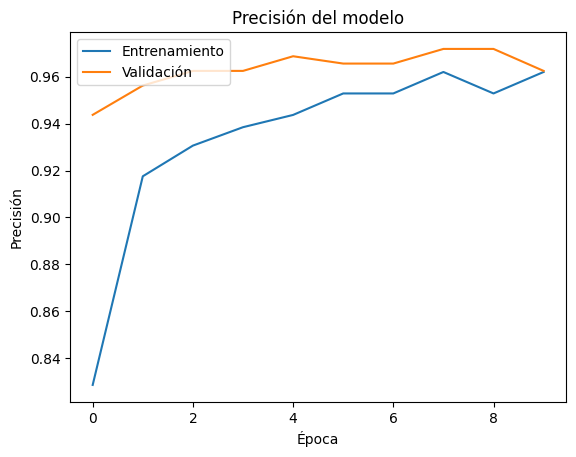

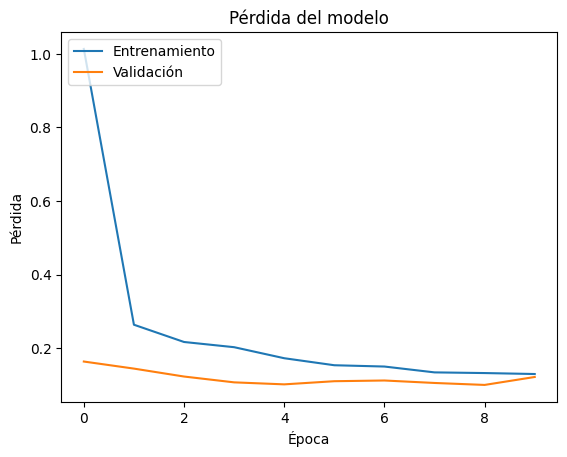

In [3]:
import tensorflow as tf
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
modelo = Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(500, 500, 3)),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, (5,3), activation='relu'),
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, (3, 3), activation='relu'), # Capa adicional
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),  # Capa de abandono para regularización
            Dense(2, activation='softmax'),  # Añade la capa Dense según el tamaño de salida de Flatten
        ])


# Aquí puedes imprimir la forma de la salida para ver cuántas neuronas necesita la siguiente capa Dense
modelo.summary()


modelo.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),  # Ajustar la tasa de aprendizaje
    loss='categorical_crossentropy',  
    metrics=['accuracy'])


historial = modelo.fit(
    generator,
    epochs=10,  # Aumentar el número de épocas
    validation_data=validation_generator,
    batch_size=32
)

# Gráficos de precisión y pérdida
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])  # Precisión de validación
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])  # Pérdida de validación
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')# Añade la capa Dense según el tamaño de salida de Flatten


plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

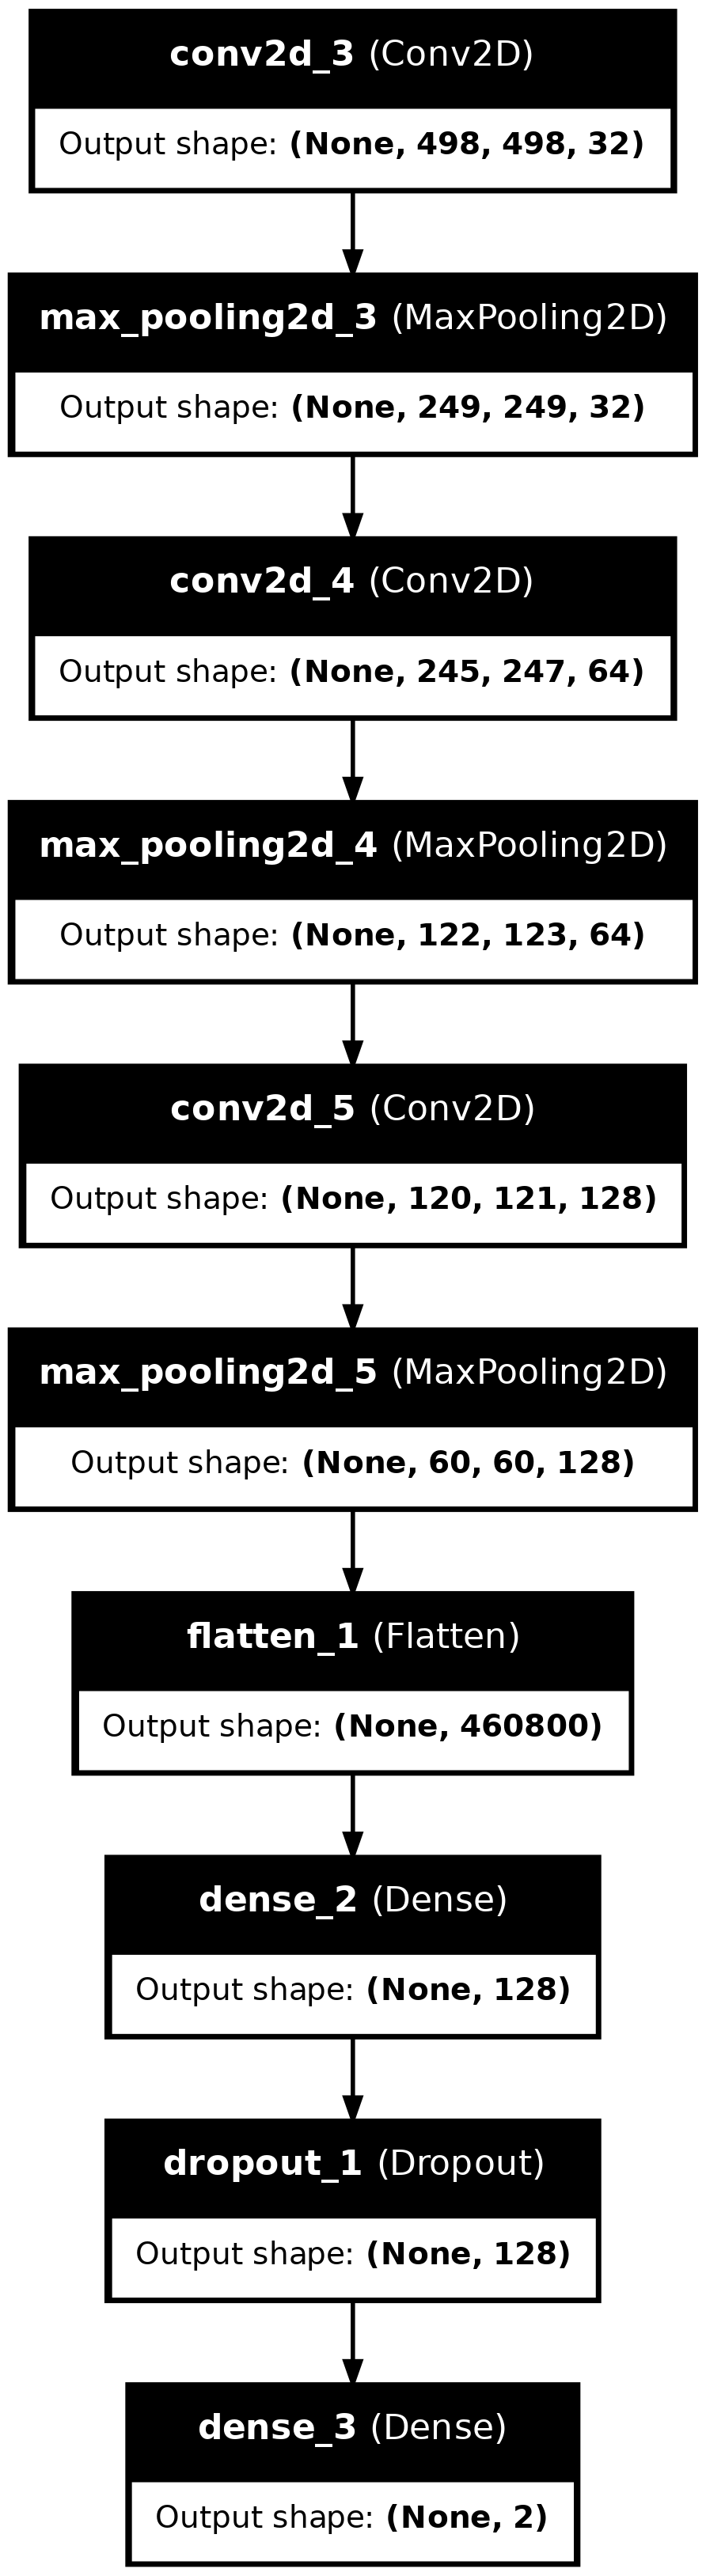

In [5]:
plot_model(modelo, to_file='/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo1_cnn.png', show_shapes=True, show_layer_names=True)

10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Confusion Matrix


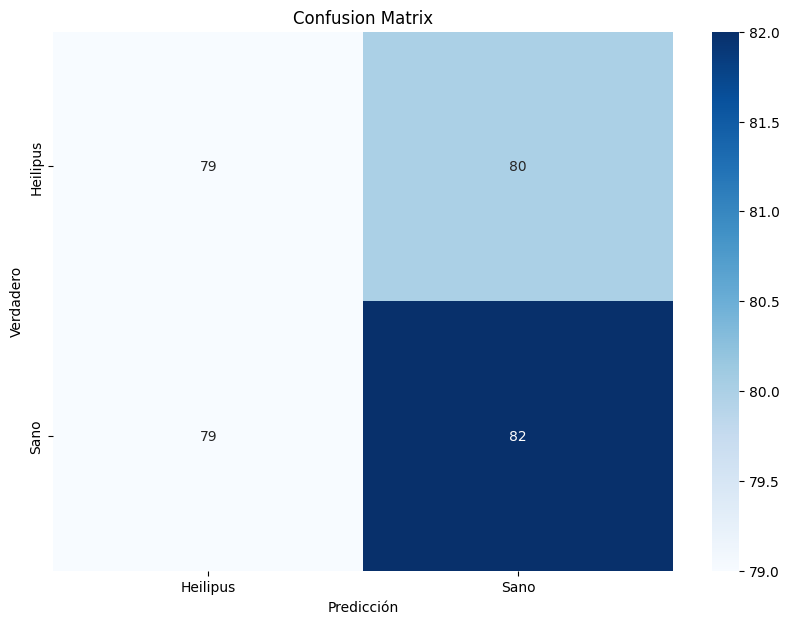

Classification Report
{'0': {'precision': 0.5, 'recall': 0.4968553459119497, 'f1-score': 0.49842271293375395, 'support': 159.0}, '1': {'precision': 0.5061728395061729, 'recall': 0.5093167701863354, 'f1-score': 0.5077399380804953, 'support': 161.0}, 'accuracy': 0.503125, 'macro avg': {'precision': 0.5030864197530864, 'recall': 0.5030860580491425, 'f1-score': 0.5030813255071247, 'support': 320.0}, 'weighted avg': {'precision': 0.5031057098765432, 'recall': 0.503125, 'f1-score': 0.5031104418357082, 'support': 320.0}}


,precision,recall,f1-score,support
0,0.500000,0.496855,0.498423,159.000000
1,0.506173,0.509317,0.507740,161.000000
accuracy,0.503125,0.503125,0.503125,0.503125
macro avg,0.503086,0.503086,0.503081,320.000000
weighted avg,0.503106,0.503125,0.503110,320.000000


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
# Evaluar el modelo en el conjunto de prueba o validación
# Asumiendo que tienes `validation_generator` como tu conjunto de validación/test
y_pred = modelo.predict(validation_generator)
y_test = validation_generator.classes  # Etiquetas verdaderas
y_pred = np.argmax(y_pred, axis=1)  # Convertir predicciones a etiquetas

# Matriz de confusión
print("Confusion Matrix")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener nombres de clases desde el generador
class_names = list(validation_generator.class_indices.keys())

# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()


# Informe de clasificación

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report")
print(report)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_cnn.csv', index=True)

cm = sns.light_palette("blue", as_cmap=True)
styled_df = report_df.style.background_gradient(cmap=cm)
display(styled_df)


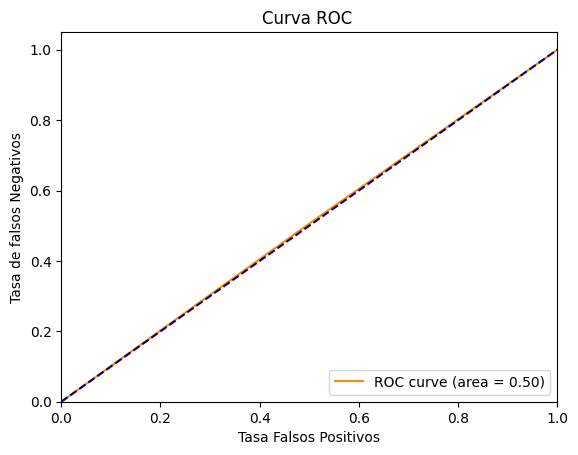

In [7]:
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa de falsos Negativos')
    plt.title('Curva ROC ')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
from keras.models import Model
import matplotlib.pyplot as plt

# Crear un modelo que devuelva las activaciones de la primera capa convolucional
activation_model = Model(inputs=modelo.input, outputs=modelo.layers[0].output)

# Obtener las activaciones de la primera capa convolucional para la primera imagen en el conjunto de entrenamiento
activations = activation_model.predict(validation_generator[0][0][0].reshape(1, 500, 500, 3))

# Visualizar las activaciones de los primeros 6 filtros
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()

ValueError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Suponiendo que tienes todas tus imágenes y etiquetas cargadas en X e Y
# X, Y = load_data()

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

fold_no = 1
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    # Crear el modelo de CNN aquí
    modelo = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(100, 130, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])

    modelo.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=32)

    # Evaluar el modelo
    scores = modelo.evaluate(X_val, Y_val, verbose=0)
    print(f'Score for fold {fold_no}: {modelo.metrics_names[1]} of {scores[1]*100}%')
    
    fold_no += 1

In [9]:
# Guardar el modelo en un archivo
modelo.save('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')


In [ ]:
# Cargar el modelo desde un archivo
from keras.models import load_model
modelo = load_model('/home/maucasco/Documents/maestria/proyecto_grado/pujc-advocato-filter-project-mngr/modelo/modelo_cnn.h5')

Type: <class 'numpy.ndarray'>
Shape of Image: (119, 230, 3)
Total Number of pixels: 82110
Image data type: uint8
Dimension: 3


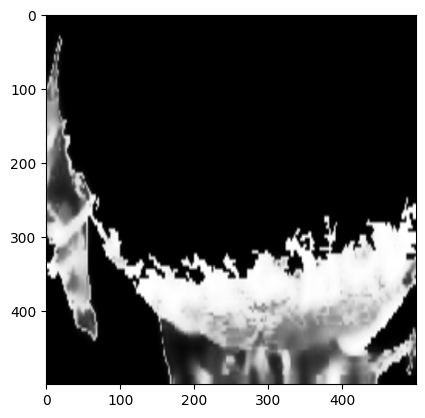

I0000 00:00:1714856312.978049   29286 service.cc:145] XLA service 0x7a4944016e00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714856312.978430   29286 service.cc:153]   StreamExecutor device (0): Host, Default Version
2024-05-04 15:58:32.991290: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops.cc:61 : INVALID_ARGUMENT: Depth of input must be a multiple of depth of filter: 1 vs 3

Stack trace for op definition: 
File "usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "usr/lib/python3.10/runpy.py", line 86, in _run_code
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
File "home/maucasco/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
File "home/maucasco/.local/lib/python3.10/site-packa

InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
<stack traces unavailable>
Depth of input must be a multiple of depth of filter: 1 vs 3

Stack trace for op definition: 
File "usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "usr/lib/python3.10/runpy.py", line 86, in _run_code
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
File "home/maucasco/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
File "home/maucasco/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
File "usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
File "home/maucasco/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
File "home/maucasco/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
File "home/maucasco/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
File "home/maucasco/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
File "home/maucasco/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
File "home/maucasco/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
File "home/maucasco/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
File "tmp/ipykernel_28373/589912383.py", line 16, in <module>
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 519, in predict
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 217, in one_step_on_data_distributed
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 206, in one_step_on_data
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 98, in predict_step
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/layers/layer.py", line 826, in __call__
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/ops/operation.py", line 48, in __call__
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/models/sequential.py", line 206, in call
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/models/functional.py", line 199, in call
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/ops/function.py", line 151, in _run_through_graph
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/models/functional.py", line 583, in call
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/layers/layer.py", line 826, in __call__
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/ops/operation.py", line 48, in __call__
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 224, in call
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 214, in convolution_op
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/ops/nn.py", line 909, in conv
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 279, in conv
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 269, in _conv_xla
File "home/maucasco/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 256, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference__conv_xla_10670[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[sequential_1_1/conv2d_3_1/StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_10718]

In [11]:

from keras.preprocessing import image
import numpy as np
# Load and preprocess the image
img_path = '/home/maucasco/Downloads/images.jpeg'
imagen = cv2.imread(img_path)[100:, :]
imagen_sin_texto,aguacate_solo, redimenciada = ProcessImages().procesar(imagen,500,500)
img_array = image.img_to_array(redimenciada)


plt.imshow(redimenciada, cmap='gray')
plt.show()
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make predictions
predictions = modelo.predict(img_array)
print(predictions)